In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
import warnings
warnings.filterwarnings("ignore")

# Creacion de Base de Datos para ML

In [4]:
taxis = pd.read_parquet('../raw_data/taxis.parquet')

In [5]:
taxis

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,type,ehail_fee,trip_type
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2.0,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,yellow,NaN,NaN
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1.0,...,0.5,2.00,0.0,1.0,21.20,2.5,0.00,yellow,NaN,NaN
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1.0,...,0.5,2.00,0.0,1.0,15.60,2.5,0.00,yellow,NaN,NaN
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1.0,...,0.5,1.00,0.0,1.0,11.10,2.5,0.00,yellow,NaN,NaN
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1.0,...,0.5,17.02,0.0,1.0,73.77,2.5,1.75,yellow,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40176766,2,2024-08-31 20:58:00,2024-08-31 21:25:00,NaN,13.50,NaN,None,223,132,NaN,...,0.0,10.03,0.0,1.0,60.67,NaN,NaN,green,NaN,NaN
40176767,2,2024-08-31 21:39:00,2024-08-31 21:56:00,NaN,1.78,NaN,None,129,7,NaN,...,0.0,3.00,0.0,1.0,21.86,NaN,NaN,green,NaN,NaN
40176768,2,2024-08-31 22:59:00,2024-08-31 23:19:00,NaN,3.27,NaN,None,255,65,NaN,...,0.0,4.89,0.0,1.0,29.84,NaN,NaN,green,NaN,NaN
40176769,2,2024-08-31 22:26:00,2024-08-31 22:42:00,NaN,2.50,NaN,None,244,41,NaN,...,0.0,0.00,0.0,1.0,21.09,NaN,NaN,green,NaN,NaN


## Extraccion de Fechas

In [6]:
taxis['trip_year'] = taxis['tpep_pickup_datetime'].dt.year

In [7]:
taxis['month'] = taxis['tpep_pickup_datetime'].dt.month

In [8]:
taxis['weekday'] = taxis['tpep_pickup_datetime'].dt.weekday

In [9]:
taxis['hour'] = taxis['tpep_pickup_datetime'].dt.hour

In [10]:
taxis['duration'] = taxis['tpep_dropoff_datetime'] - taxis['tpep_pickup_datetime']
taxis['duration'] = taxis['duration'].dt.total_seconds() / 60

## Transformaciones

In [11]:
taxis['type'] = taxis['type'].apply(lambda x : 1 if x=='yellow' else 2)

In [ ]:
taxis.drop(columns=['tpep_dropoff_datetime','tpep_pickup_datetime','VendorID','store_and_fwd_flag','extra','fare_amount','mta_tax','tip_amount',
                    'tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','ehail_fee','trip_year','RatecodeID'], inplace=True)

In [20]:
taxis

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,type,trip_type,month,weekday,hour,duration
0,1.0,0.80,163,230,2.0,11.50,1,NaN,9,4,0,4.733333
1,2.0,2.34,236,233,1.0,21.20,1,NaN,9,4,0,11.800000
2,1.0,1.62,162,236,1.0,15.60,1,NaN,9,4,0,4.050000
3,1.0,0.74,141,229,1.0,11.10,1,NaN,9,4,0,1.866667
4,1.0,9.85,138,230,1.0,73.77,1,NaN,9,4,0,36.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
40176766,NaN,13.50,223,132,NaN,60.67,2,NaN,8,5,20,27.000000
40176767,NaN,1.78,129,7,NaN,21.86,2,NaN,8,5,21,17.000000
40176768,NaN,3.27,255,65,NaN,29.84,2,NaN,8,5,22,20.000000
40176769,NaN,2.50,244,41,NaN,21.09,2,NaN,8,5,22,16.000000


In [21]:
taxis.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,type,trip_type,month,weekday,hour,duration
count,3.701897e+07,4.017677e+07,4.017677e+07,4.017677e+07,4.014044e+07,4.017677e+07,4.017677e+07,666902.000000,4.017677e+07,4.017677e+07,4.017677e+07,4.017677e+07
mean,1.348960e+00,4.730959e+00,1.634134e+02,1.632935e+02,1.133085e+00,2.800864e+01,1.017505e+00,1.042619,6.516404e+00,3.013891e+00,1.429405e+01,1.675930e+01
std,8.526303e-01,3.430241e+02,6.468635e+01,6.980203e+01,6.194031e-01,6.948751e+01,1.311441e-01,0.201998,3.429223e+00,1.926310e+00,5.822491e+00,4.456770e+03
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.265450e+03,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,-2.824830e+07
25%,1.000000e+00,1.010000e+00,1.320000e+02,1.130000e+02,1.000000e+00,1.575000e+01,1.000000e+00,1.000000,4.000000e+00,1.000000e+00,1.100000e+01,7.750000e+00
50%,1.000000e+00,1.750000e+00,1.610000e+02,1.620000e+02,1.000000e+00,2.100000e+01,1.000000e+00,1.000000,6.000000e+00,3.000000e+00,1.500000e+01,1.285000e+01
75%,1.000000e+00,3.340000e+00,2.330000e+02,2.340000e+02,1.000000e+00,3.060000e+01,1.000000e+00,1.000000,1.000000e+01,5.000000e+00,1.900000e+01,2.091667e+01
max,9.000000e+00,3.270252e+05,2.650000e+02,2.650000e+02,5.000000e+00,3.341453e+05,2.000000e+00,2.000000,1.200000e+01,6.000000e+00,2.300000e+01,9.767517e+03


In [27]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40176771 entries, 0 to 40176770
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   trip_distance    float64
 2   PULocationID     int32  
 3   DOLocationID     int32  
 4   payment_type     float64
 5   total_amount     float64
 6   type             int64  
 7   trip_type        float64
 8   month            int32  
 9   weekday          int32  
 10  hour             int32  
 11  duration         float64
dtypes: float64(6), int32(5), int64(1)
memory usage: 2.8 GB


## Matriz de correlacion Pre

In [28]:
correlacion=taxis.corr()

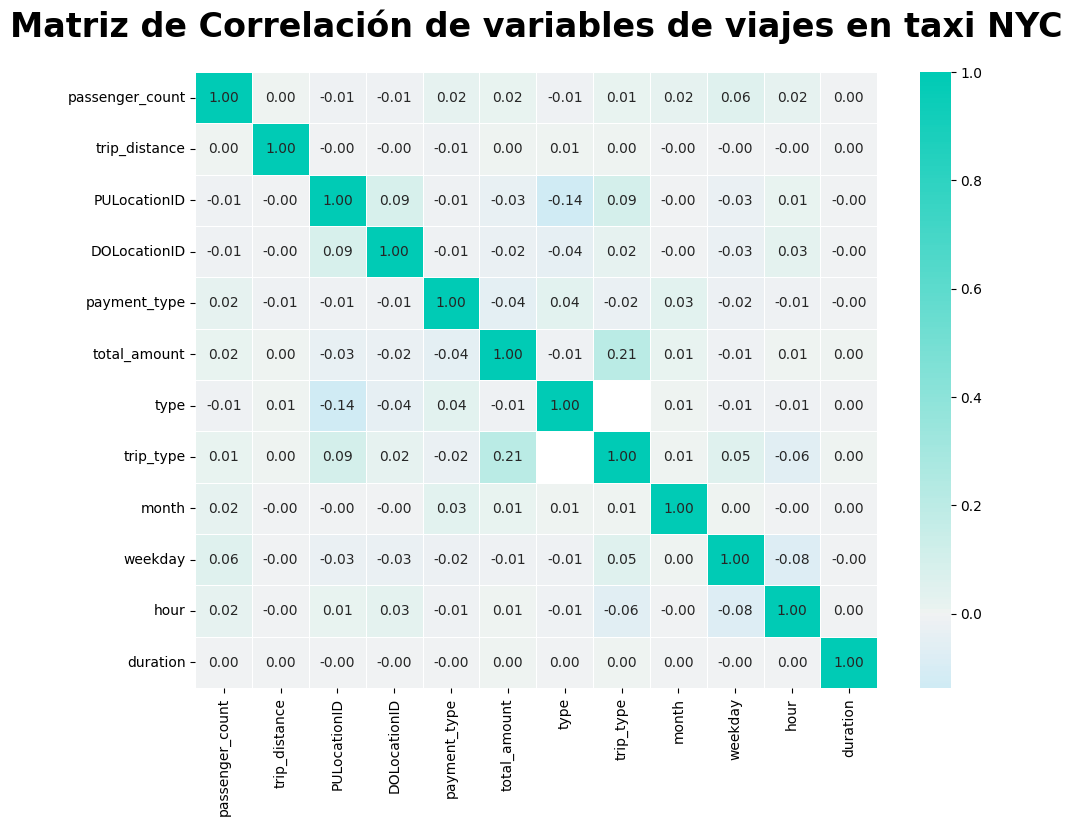

In [29]:
plt.figure(figsize=(11, 8))

sns.heatmap(correlacion, annot=True,fmt="0.2f", linewidths=0.5, cmap=sns.diverging_palette(230, 180, s=160, l=70, center="light", as_cmap=True), center=0)
plt.title('Matriz de Correlación de variables de viajes en taxi NYC', fontsize=24, fontweight='bold', pad=25)
plt.show()

In [110]:
taxis['n_trips'] = 1

NameError: name 'taxis' is not defined

## Matrices de ML

In [41]:
df_ml = taxis.groupby(['PULocationID',
                       'month',
                       'weekday',
                       'hour']).agg({'passenger_count': 'mean',
                                     'trip_distance': 'mean',
                                     'payment_type': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
                                     'total_amount':'mean',
                                     'type':lambda x: x.mode().iloc[0] if not x.mode().empty else None,
                                     'trip_type':lambda x: x.mode().iloc[0] if not x.mode().empty else None,
                                     'duration':'mean',
                                     'n_trips':'count'}).reset_index()

In [ ]:
#df_ml.to_parquet('df_ml.parquet')

In [ ]:
#df_ml = pd.read_parquet('df_ml.parquet')

In [48]:
df_ml['passenger_count'] = df_ml['passenger_count'].fillna(0).astype(int)

In [50]:
df_ml

,PULocationID,month,weekday,hour,passenger_count,trip_distance,payment_type,total_amount,type,trip_type,duration,n_trips
0,1,1,0,5,1,2.216000,1.0,75.460000,1,NaN,5.643333,5
1,1,1,0,6,3,0.012000,1.0,66.320000,1,NaN,3.726667,5
2,1,1,0,7,0,0.000000,0.0,90.290000,1,NaN,0.216667,1
3,1,1,0,8,2,25.870000,1.0,135.180000,1,NaN,41.450000,1
4,1,1,0,9,2,0.000000,1.0,125.800000,1,NaN,0.277778,3
...,...,...,...,...,...,...,...,...,...,...,...,...
345857,265,12,6,19,1,0.606154,1.0,102.168462,1,NaN,5.560256,13
345858,265,12,6,20,1,2.673529,1.0,73.715294,1,NaN,18.936275,17
345859,265,12,6,21,1,1.814286,1.0,109.807143,1,NaN,5.395238,14
345860,265,12,6,22,2,3.066190,1.0,100.489048,1,NaN,8.025397,21


# Analisis Previo

#### Temporales

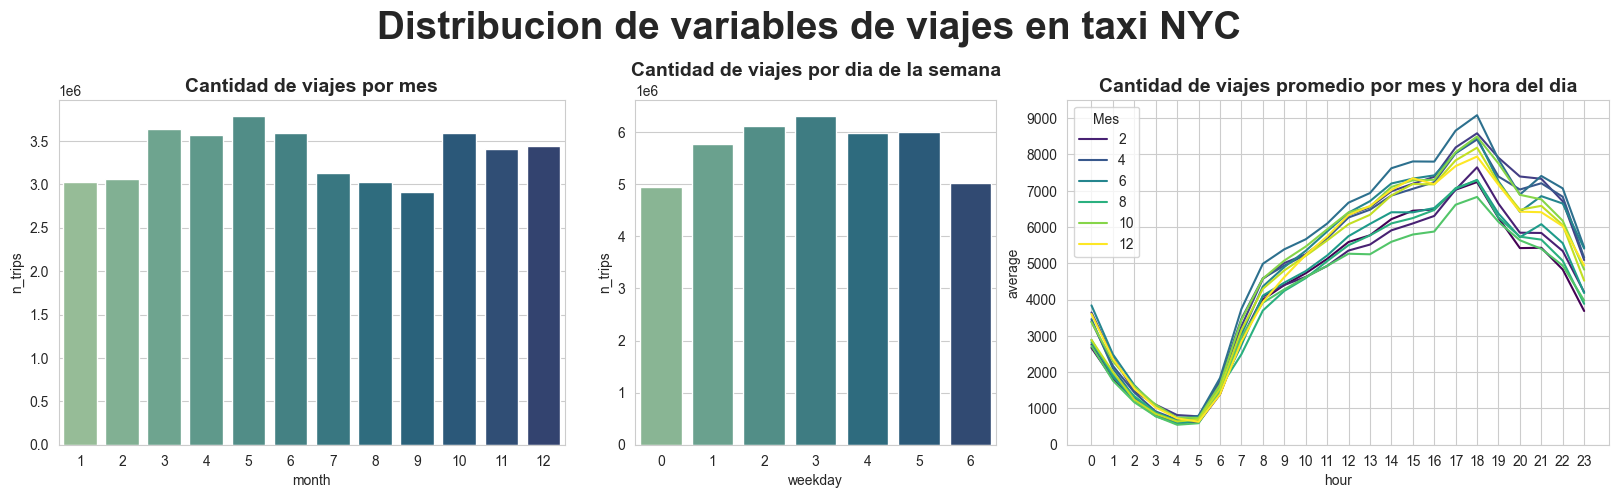

In [106]:
sns.set_palette("crest")
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,3, figsize = (20,5), gridspec_kw={'width_ratios': [1.4, 1, 1.5]})
fig.suptitle("Distribucion de variables de viajes en taxi NYC",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.8,wspace=0.15)

sns.barplot(data=df_ml.groupby('month').agg({'n_trips':'sum'}), x='month', y='n_trips', palette='crest', ax = ax[0])
ax[0].set_title('Cantidad de viajes por mes', fontsize=14, fontweight='bold')

sns.barplot(data=df_ml.groupby('weekday').agg({'n_trips':'sum'}), x='weekday',y='n_trips', palette='crest', ax=ax[1])
ax[1].set_title('Cantidad de viajes por dia de la semana', fontsize=14, fontweight='bold')

d = df_ml.groupby(['month','hour']).agg({'n_trips':'sum'})
d['average'] = d['n_trips']/30
sns.lineplot(data=d, x="hour", y="average", hue="month",  palette='viridis', ax=ax[2])
ax[2].set_title('Cantidad de viajes promedio por mes y hora del dia', fontsize=14, fontweight='bold')
ax[2].legend(title='Mes')
ax[2].set_xticks(range(0,24))
ax[2].set_yticks(range(0,10000,1000))

plt.show()

## Otras

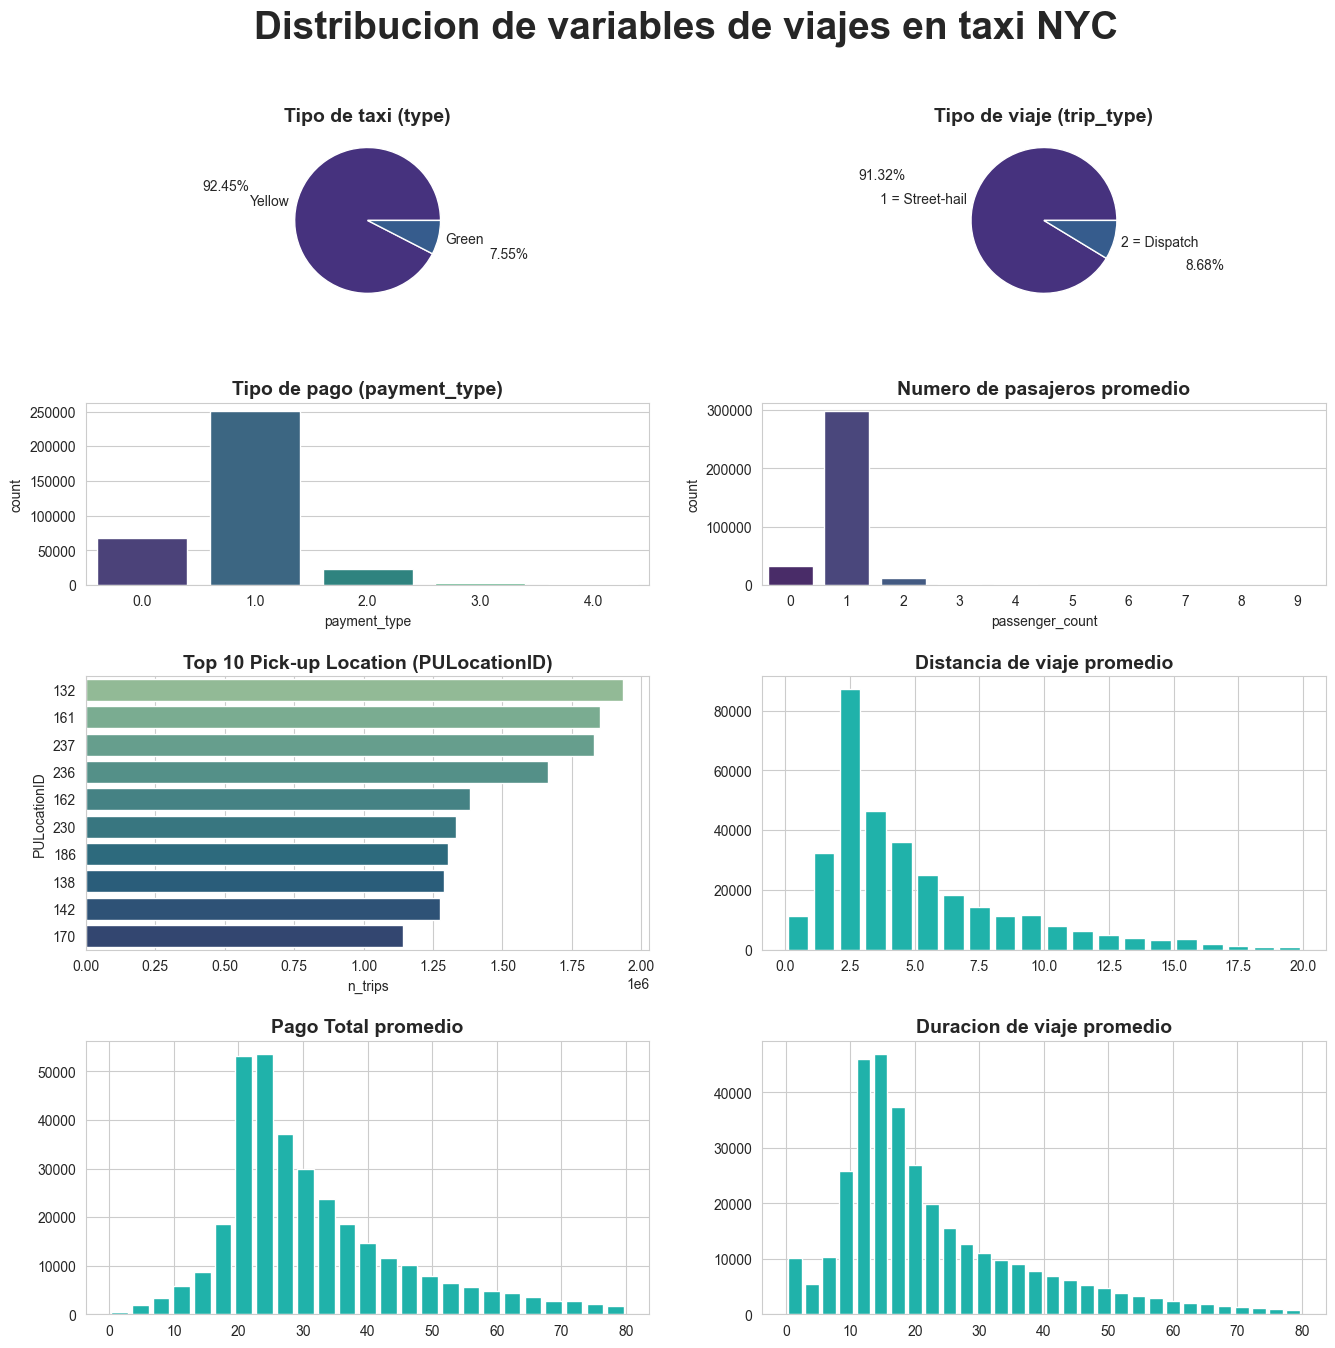

In [109]:
sns.set_palette("viridis")
sns.set_style("whitegrid")

fig, ax = plt.subplots(4,2, figsize = (16,15), gridspec_kw={'height_ratios': [1, 1, 1.5, 1.5]})
fig.suptitle("Distribucion de variables de viajes en taxi NYC",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.4)

ax[0,0].pie(df_ml['type'].value_counts(), labels=['Yellow', 'Green'], autopct='%1.2f%%', pctdistance=2)
ax[0,0].set_title('Tipo de taxi (type)',fontsize=14, fontweight='bold')

ax[0,1].pie(df_ml['trip_type'].value_counts(), labels=['1 = Street-hail', '2 = Dispatch'], autopct='%1.2f%%', pctdistance=2.3)
ax[0,1].set_title('Tipo de viaje (trip_type)',fontsize=14, fontweight='bold')

sns.barplot(data=df_ml['payment_type'].value_counts().to_frame(), x='payment_type',y='count', palette='viridis', ax=ax[1,0])
ax[1,0].set_title('Tipo de pago (payment_type)',fontsize=14, fontweight='bold')

sns.barplot(data=df_ml['passenger_count'].value_counts().to_frame(), x='passenger_count',y='count',palette='viridis', ax = ax[1,1])
ax[1,1].set_title('Numero de pasajeros promedio',fontsize=14, fontweight='bold')

d=df_ml[['PULocationID','n_trips']]
d['PULocationID'] = d['PULocationID'].astype(str)
d=d.groupby(['PULocationID']).agg({'n_trips':'sum'}).sort_values(by='n_trips',ascending=False).head(10)

sns.barplot(data=d, x='n_trips',y='PULocationID', palette='crest', orient='h', ax=ax[2,0])
ax[2,0].set_title('Top 10 Pick-up Location (PULocationID)',fontsize=14, fontweight='bold')


ax[2,1].hist(df_ml[(df_ml['trip_distance']>0)&(df_ml['trip_distance']<20)]['trip_distance'], bins=20, rwidth=0.8, color='lightseagreen')
ax[2,1].set_title('Distancia de viaje promedio',fontsize=14, fontweight='bold')

ax[3,0].hist(df_ml[(df_ml['total_amount']>0)&(df_ml['total_amount']<80)]['total_amount'], bins=25, rwidth=0.8, color='lightseagreen')
ax[3,0].set_title('Pago Total promedio',fontsize=14, fontweight='bold')

ax[3,1].hist(df_ml[(df_ml['duration']>0)&(df_ml['duration']<80)]['duration'], bins=30, rwidth=0.8, color='lightseagreen')
ax[3,1].set_title('Duracion de viaje promedio', fontsize=14, fontweight='bold')

plt.show()

## Matriz de Correlacion Post

In [107]:
correlacion=df_ml.corr()

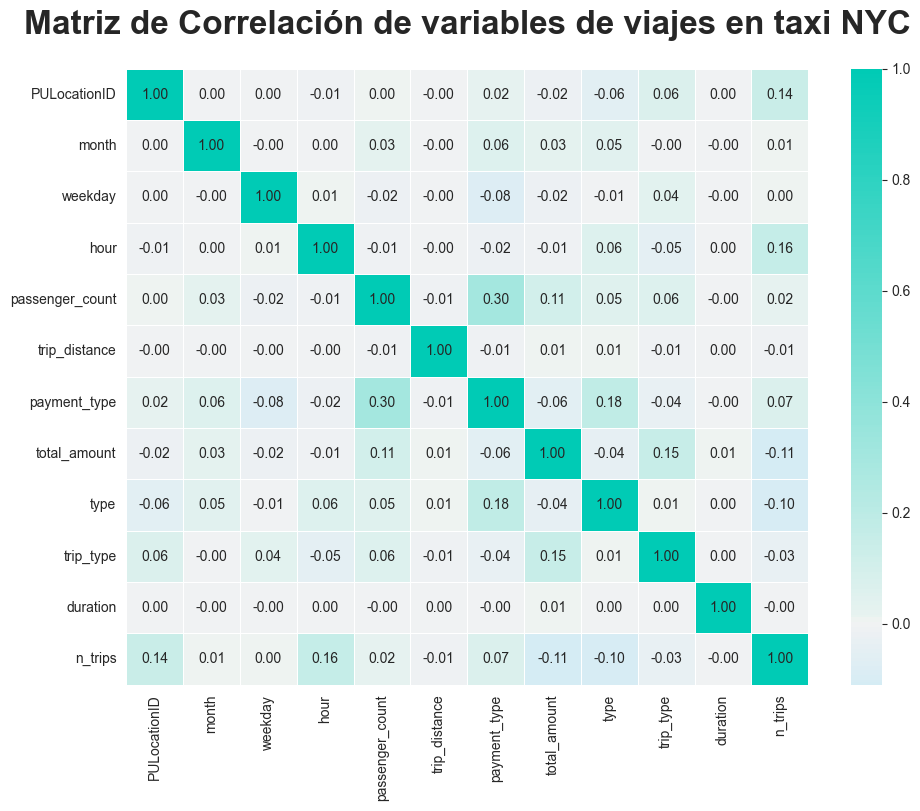

In [108]:
plt.figure(figsize=(11, 8))

sns.heatmap(correlacion, annot=True,fmt="0.2f", linewidths=0.5, cmap=sns.diverging_palette(230, 180, s=160, l=70, center="light", as_cmap=True), center=0)
plt.title('Matriz de Correlación de variables de viajes en taxi NYC', fontsize=24, fontweight='bold', pad=25)
plt.show()

In [119]:
df_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345862 entries, 0 to 345861
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   PULocationID     345862 non-null  category
 1   month            345862 non-null  int32   
 2   weekday          345862 non-null  category
 3   hour             345862 non-null  int32   
 4   passenger_count  345862 non-null  int64   
 5   trip_distance    345862 non-null  float64 
 6   payment_type     344453 non-null  category
 7   total_amount     345862 non-null  float64 
 8   type             345862 non-null  category
 9   trip_type        86744 non-null   category
 10  duration         345862 non-null  float64 
 11  n_trips          345862 non-null  int64   
dtypes: category(5), float64(3), int32(2), int64(2)
memory usage: 17.8 MB


# Prepararcion

In [ ]:
df_ml['PULocationID'] = df_ml['PULocationID'].astype('category')
df_ml['type'] = df_ml['type'].astype('category')
df_ml['trip_type'] = df_ml['trip_type'].astype('category')
df_ml['payment_type'] = df_ml['payment_type'].astype('category')
df_ml['weekday'] = df_ml['weekday'].astype('category')